<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Joint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Japan's COVID-19 Response Case Study**

Research Question: How did Japan’s containment and vaccination policies interact to reduce case growth between 2020–2022, and how effective were later easing measures?

## 📊 Exploratory Data Analysis (EDA): Japan
This section explores trends in cases, deaths, and policy measures from the OxCGRT dataset.

## <font color='crimson'>**Milestone #1 - Data Preparation**</font>
GOAL: The main goal of this milestone is to set up your environment, install the required packages, load the data and do some basic exploratory data analysis.

In [ ]:
# Loading libraries
import pandas as pd                       # for data manipulation and analysis
import matplotlib.pyplot as plt           # for 2D plotting
from matplotlib.dates import DateFormatter
import seaborn as sns                     # for statistical data visualization
sns.set(style='whitegrid')                # Set visual style for seaborn
import folium                             # for data visualization on an interactive leaflet map
import geopandas as gpd
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Getting started
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


##<font color='crimson'> **Milestone #1 - Data Preparation** </font>

In [ ]:
# Read the data
df_global = pd.read_csv("/content/drive/MyDrive/Analyzing_Pandemic_Responses/data/OxCGRT_compact_national_v1.csv")
df_global.shape

(202760, 56)

In [ ]:
# print info for national dataset
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 

In [ ]:
# Print the first few ows for inspection
df_global.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Describing the data using the describe function of pandas
global_stats = df_global.describe()
global_stats

,RegionName,RegionCode,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,...,V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,0.0,0.0,2.027600e+05,202760.000000,128263.000000,202760.000000,133824.000000,202760.000000,138576.000000,202760.000000,...,127138.000000,202760.000000,90957.000000,2.016640e+05,2.016640e+05,200568.000000,202760.000000,202760.000000,202760.000000,202760.000000
mean,NaN,NaN,2.021066e+07,1.193199,0.835268,1.149645,0.797630,1.103250,0.858857,2.010209,...,1.803316,3.100533,0.278681,1.340886e+06,1.955307e+04,22.603420,42.675426,44.857776,46.699253,31.968029
std,NaN,NaN,8.174621e+03,1.139102,0.370940,0.988767,0.401768,0.851878,0.348170,1.710198,...,0.471447,2.411897,0.448353,5.583371e+06,7.556113e+04,29.597555,24.930305,19.649721,19.865910,32.962193
min,NaN,NaN,2.020010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.020098e+07,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,5.146750e+03,6.400000e+01,0.000000,22.220000,31.250000,33.330000,0.000000
50%,NaN,NaN,2.021070e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,5.000000,0.000000,5.987900e+04,8.650000e+02,2.330000,42.590000,46.880000,48.720000,25.000000
75%,NaN,NaN,2.022040e+07,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,5.218538e+05,7.470000e+03,46.570000,62.040000,60.000000,62.020000,62.500000
max,NaN,NaN,2.022123e+07,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,1.007653e+08,1.092764e+06,105.750000,100.000000,91.150000,93.450000,100.000000


##<font color='crimson'> **Milestone #2 - Data Ethics, Pre-Processing, and Exploration** </font>

In [ ]:
# show unique country name and country code values
df_global['CountryName'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong',
      

In [ ]:
# show unique country code
df_global[ 'CountryCode'].unique()

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'AUS', 'AUT',
       'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS',
       'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN',
       'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD',
       'COG', 'COL', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI',
       'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST',
       'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GHA',
       'GIN', 'GMB', 'GRC', 'GRL', 'GTM', 'GUM', 'GUY', 'HKG', 'HND',
       'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL',
       'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KIR', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LIE', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG',
       'MEX', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI',
       'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL',
       'OMN', 'PAK',

In [ ]:
# Create a dataframe with data from Japan only
df_japan = df_global[(df_global['CountryCode'] == 'JPN') & (df_global['CountryName'] == 'Japan')].copy()
df_japan.shape

(1096, 56)

In [ ]:
# Print head for Japan datatset
df_japan.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
93160,Japan,JPN,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93161,Japan,JPN,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93162,Japan,JPN,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93163,Japan,JPN,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93164,Japan,JPN,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Inspect date
df_japan['Date'].head()

,Date
93160,20200101
93161,20200102
93162,20200103
93163,20200104
93164,20200105


In [ ]:
# Convert date to date format
df_japan['Date'] = pd.to_datetime(df_japan['Date'], format='%Y%m%d', errors='coerce')
df_japan = df_japan.sort_values('Date').dropna(subset=['Date'])
df_japan['Date'].head()

,Date
93160,2020-01-01
93161,2020-01-02
93162,2020-01-03
93163,2020-01-04
93164,2020-01-05


**Check the dataset for missing values.**

In [ ]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = df_japan.isnull().sum()

# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df_japan)) * 100

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data

,Missing Values,Percentage
CountryName,0,0.000000
CountryCode,0,0.000000
RegionName,1096,100.000000
RegionCode,1096,100.000000
Jurisdiction,0,0.000000
Date,0,0.000000
C1M_School closing,0,0.000000
C1M_Flag,61,5.565693
C2M_Workplace closing,0,0.000000
C2M_Flag,175,15.967153


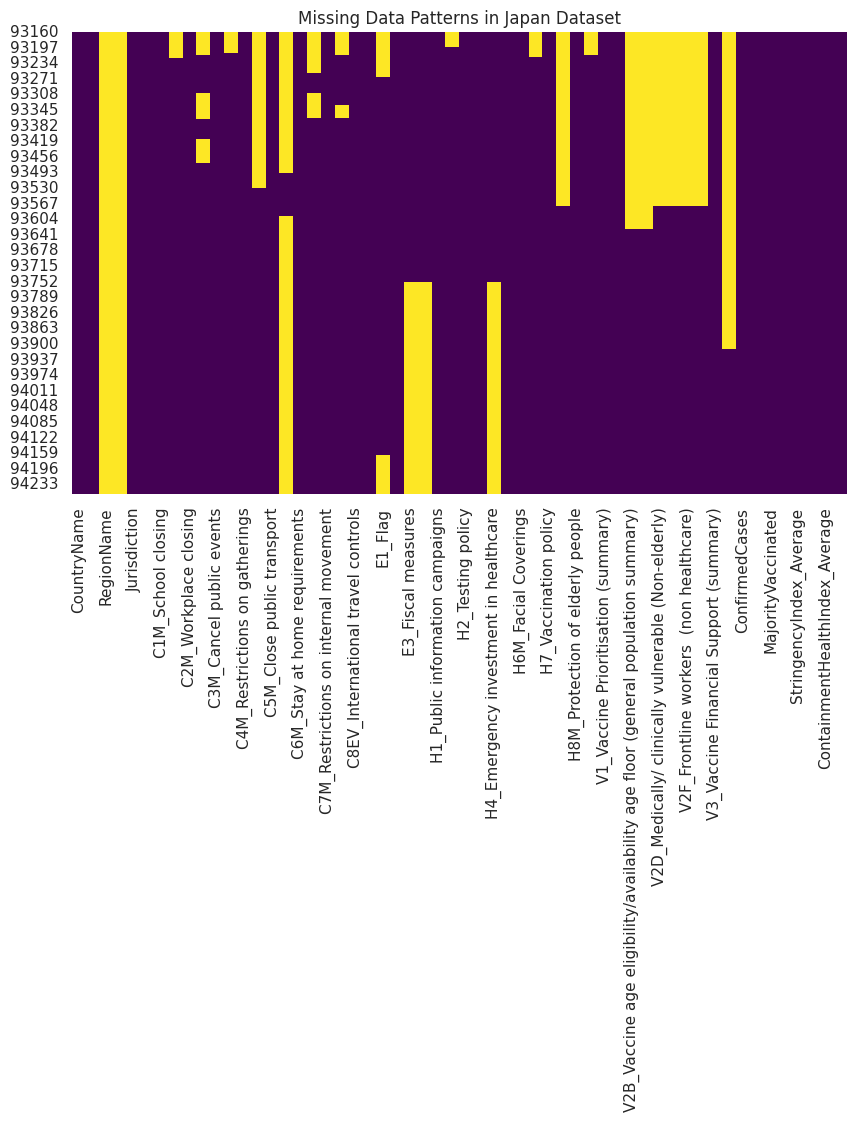

In [ ]:
# Heatmap showing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_japan.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Patterns in Japan Dataset')
plt.show()

Here's an overview of the missing values in the dataset:

Columns such as ConfirmedCases, ConfirmedDeaths, and policy indices (StringencyIndex, Investment in vaccines, Facial Coverings, etc.) have 0% missing values, ensuring reliability for core analysis.

RegionName/RegionCode is 100% missing and it is normal since this is national-level data.

Other notable variables with significant missing data include Flag, Mandatory Vaccination, and Fiscal Measures.

In [ ]:
# Drop unnecessary columns
cols_to_drop = [
    'RegionName', 'RegionCode',  # 100% missing (national-level data)
    'C5M_Flag'  # >65% missing (unreliable)
]
df_clean = df_japan.drop(columns=cols_to_drop)

In [ ]:
# TODO: Describe the data using the describe function of pandas
desc_stats = df_clean = df_japan.drop(columns=cols_to_drop)
.describe()
desc_stats

,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,C4M_Flag,C5M_Close public transport,...,V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,1096,1096.000000,1035.000000,1096.000000,921.000000,1096.000000,1046.000000,1096.000000,726.000000,1096.000000,...,683.000000,1096.000000,345.0,1.096000e+03,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2021-07-01 12:00:00,1.150547,0.869565,0.985401,0.295331,0.982664,0.856597,0.768248,0.767218,0.093066,...,1.664714,3.115876,0.0,4.694669e+06,16225.742701,37.470091,40.358184,49.889754,44.706651,86.177007
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-09-30 18:00:00,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.0,8.405375e+04,1581.000000,0.000000,35.190000,48.440000,41.670000,100.000000
50%,2021-07-01 12:00:00,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,5.000000,0.0,8.022245e+05,14820.500000,15.690000,43.080000,52.080000,46.650000,100.000000
75%,2022-04-01 06:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,5.000000,0.0,6.626480e+06,28215.750000,81.300000,47.220000,56.670000,50.480000,100.000000
max,2022-12-31 00:00:00,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,5.000000,0.0,2.923468e+07,57274.000000,83.220000,55.090000,61.870000,56.420000,100.000000
std,NaN,0.636887,0.336944,0.552096,0.456439,0.271425,0.350651,0.624562,0.422896,0.290657,...,0.472436,2.424058,0.0,7.533503e+06,15377.587004,38.669190,10.284434,10.878847,9.131039,28.438537


## ===== VISUALIZATIONS =====

**Inspecting Confirmed Cases**

In [ ]:
# Calculate daily metrics (with error handling)
df_clean['DailyCases'] = df_clean['ConfirmedCases'].diff().fillna(0).clip(lower=0)
df_clean['Cases_7dayAvg'] = df_clean['DailyCases'].rolling(7, min_periods=1).mean()

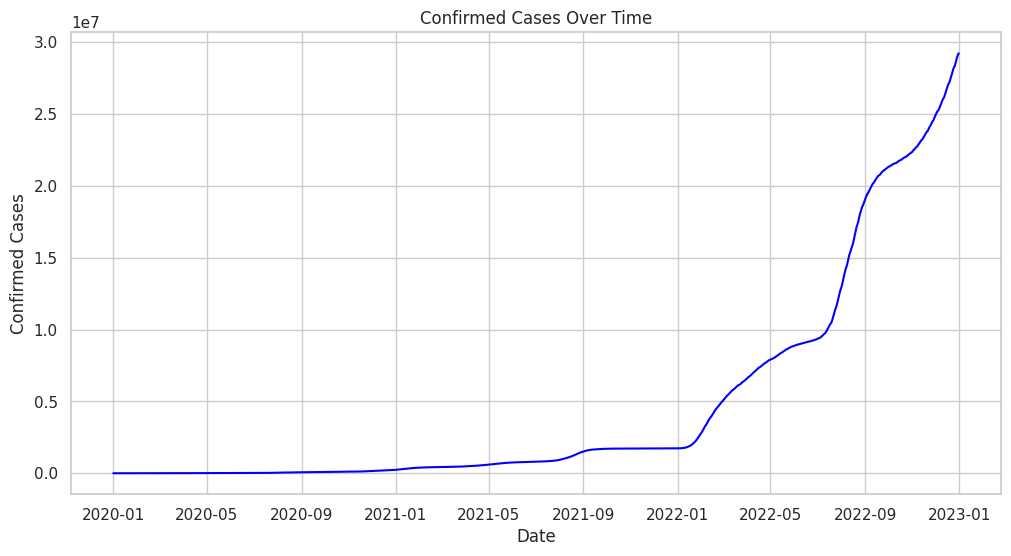

In [ ]:
# Plotting confirmed number of cases overtime per week
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedCases', data=df_clean, color='blue')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

Text(0, 0.5, 'Daily Cases')

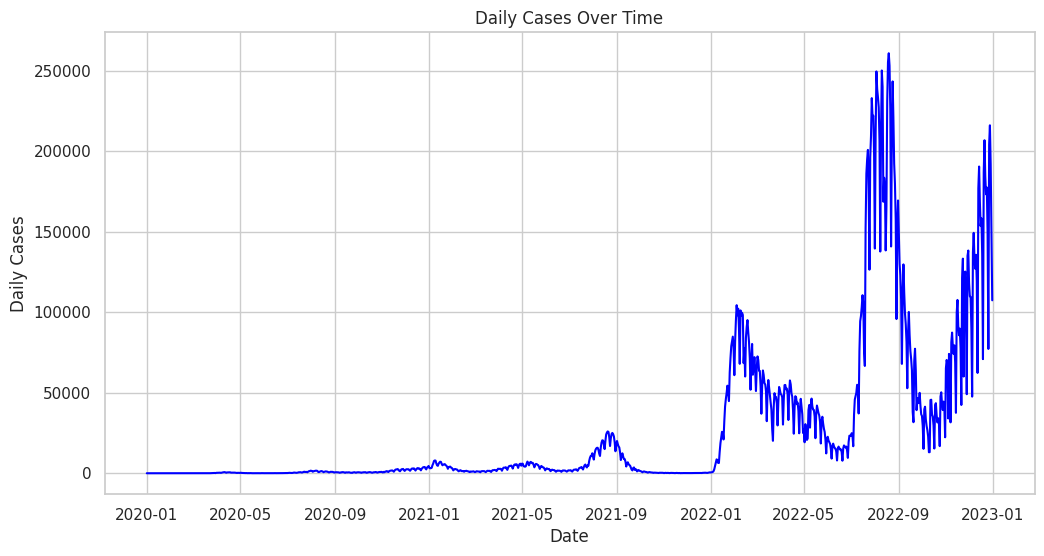

In [ ]:
# Plot Daily cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyCases', data=df_clean, color='blue')
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Cases')

Text(0, 0.5, '7-Day Moving Average')

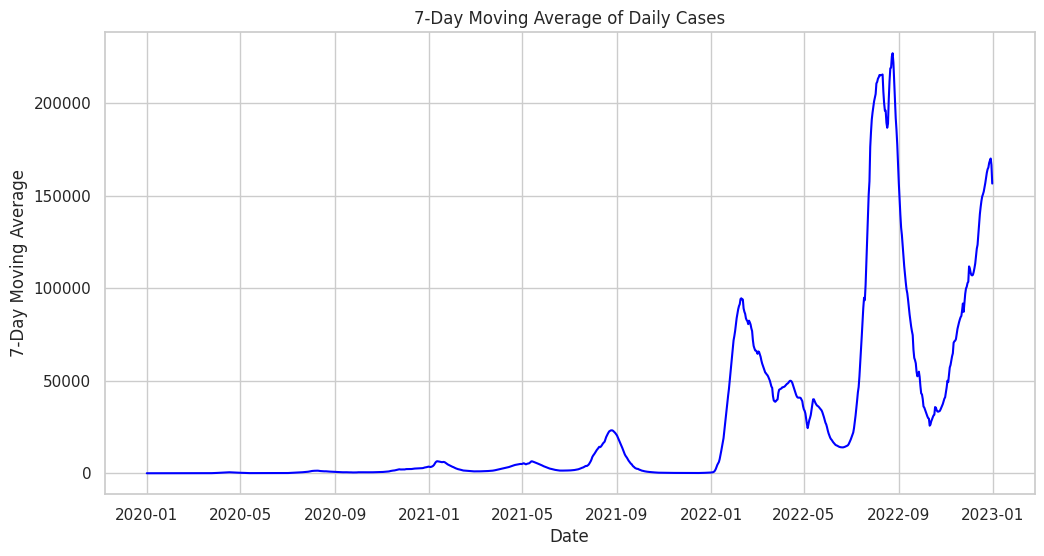

In [ ]:
# Plotting 7 day moving average of cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cases_7dayAvg', data=df_clean, color='blue')
plt.title('7-Day Moving Average of Daily Cases')
plt.xlabel('Date')
plt.ylabel('7-Day Moving Average')

**Inspecting Daily Deaths**

Text(0, 0.5, 'Confirmed Deaths')

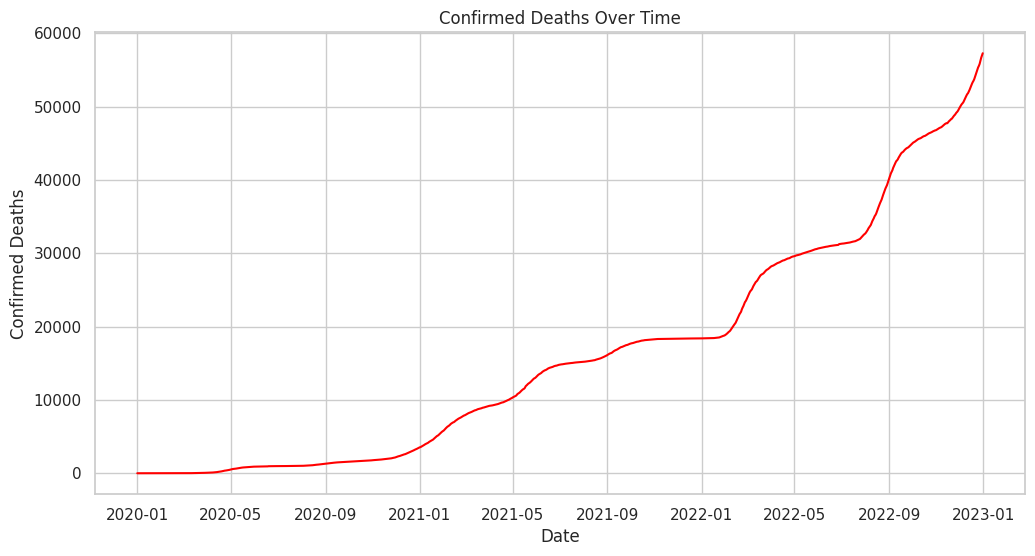

In [ ]:
# Plotting confirmed number of deaths overtime
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedDeaths', data=df_clean, color='red')
plt.title('Confirmed Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')

In [ ]:
# Calculate daily metrics of deaths (with error handling)
df_clean['DailyDeaths'] = df_clean['ConfirmedDeaths'].diff().fillna(0).clip(lower=0)
df_clean['Deaths_7dayAvg'] = df_clean['DailyDeaths'].rolling(7, min_periods=1).mean()

Text(0, 0.5, 'Daily Deaths')

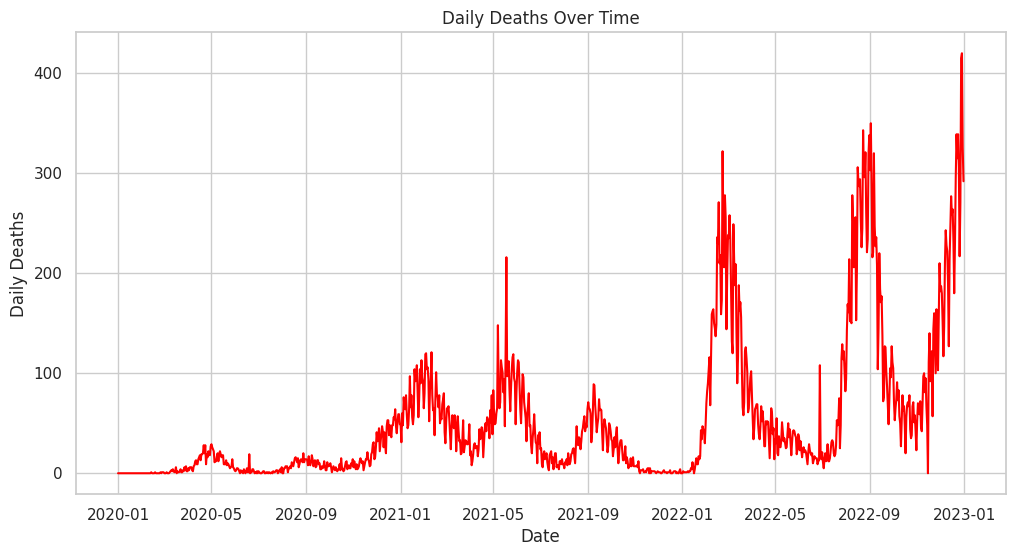

In [ ]:
# plot daily deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyDeaths', data=df_clean, color='red')
plt.title('Daily Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')

Text(0.5, 0, 'Date')

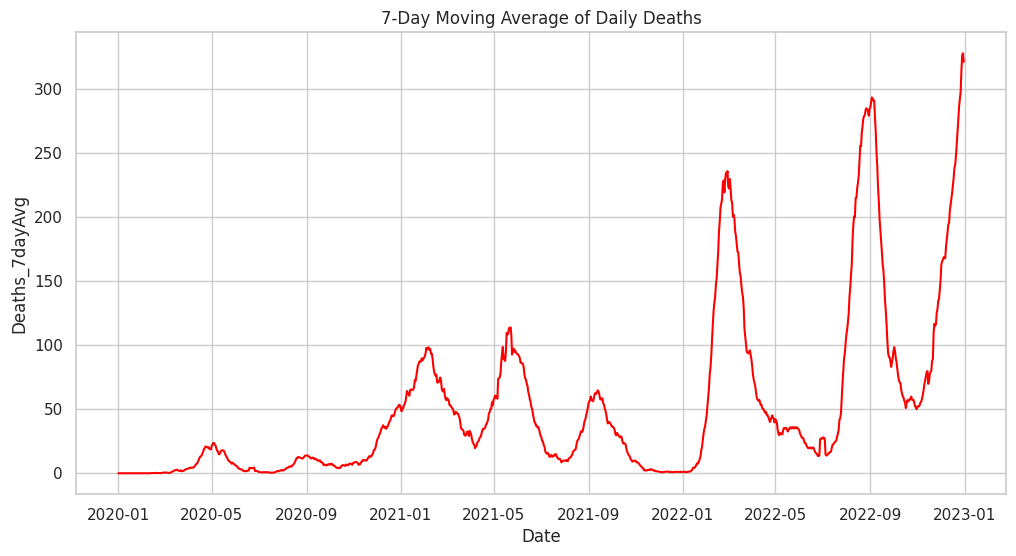

In [ ]:
# Plotting 7 day moving average of deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths_7dayAvg', data=df_clean, color='red')
plt.title('7-Day Moving Average of Daily Deaths')
plt.xlabel('Date')

**Introducing Policy Events**

In [ ]:
# Key Policy Events (Japan-specific)
policy_events = {
    # 2020
    'First Case Reported': '2020-01-16',
    'School Closures Nationwide': '2020-03-02',
    '1st State of Emergency (7 Prefectures)': '2020-04-07',
    'Nationwide Emergency Expansion': '2020-04-16',
    'GoTo Travel Campaign Paused': '2020-12-28',

    # 2021
    '2nd State of Emergency (11 Prefectures)': '2021-01-07',
    'Vaccine Rollout Begins (Healthcare Workers)': '2021-02-17',
    'Elderly Vaccination Starts': '2021-04-12',
    '3rd State of Emergency (Tokyo/Osaka)': '2021-04-25',
    'Olympics Held Without Spectators': '2021-07-23',
    'Vaccine Passport System Launched': '2021-12-01',

    # 2022
    'Omicron Border Restrictions': '2022-01-08',
    'Booster Shots Accelerated': '2022-03-01',
    'Reopening to Tourists (Guided Tours)': '2022-06-10',
    '7th COVID Wave Peak (BA.5 Variant)': '2022-08-01',
    'Full Tourism Reopening': '2022-10-11',
}

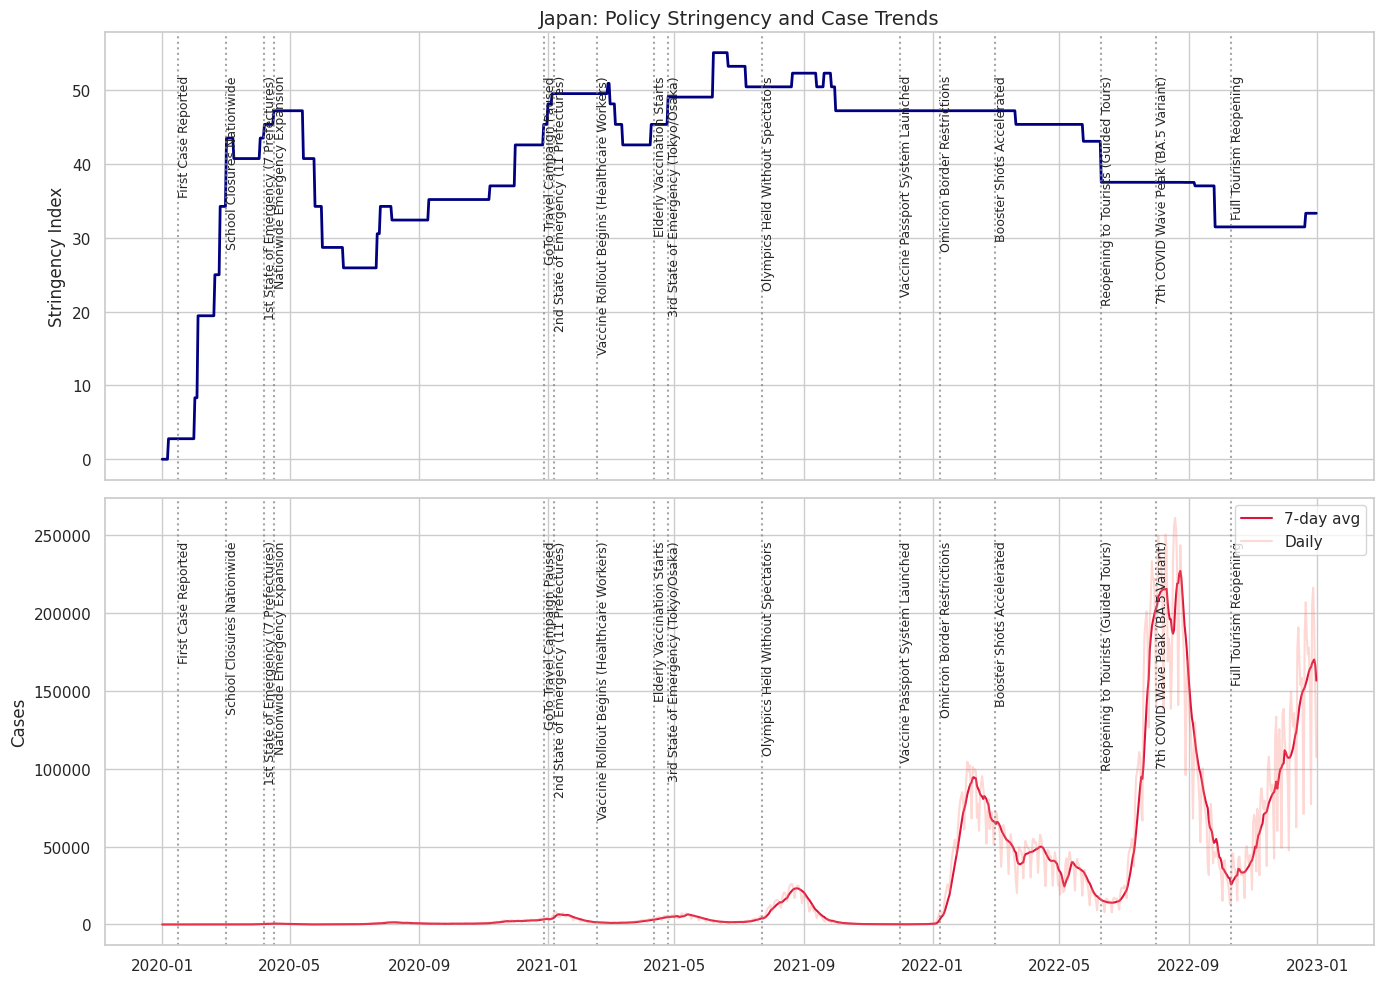

In [ ]:
# Plotting Policy Stringency vs Cases
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Policy Stringency
ax1.plot(df_clean['Date'], df_clean['StringencyIndex_Average'],
        color='navy', linewidth=2)
ax1.set_ylabel('Stringency Index', fontsize=12)
ax1.set_title('Japan: Policy Stringency and Case Trends', fontsize=14)

# Case Trends with 7-day avg
ax2.plot(df_clean['Date'], df_clean['Cases_7dayAvg'],
        color='crimson', label='7-day avg')
ax2.plot(df_clean['Date'], df_clean['DailyCases'],
        color='salmon', alpha=0.3, label='Daily')
ax2.set_ylabel('Cases', fontsize=12)

# Add policy events
for event, date in policy_events.items():
    date = pd.to_datetime(date)
    for ax in (ax1, ax2):
        ax.axvline(date, color='gray', linestyle=':', alpha=0.7)
        ax.text(date, ax.get_ylim()[1]*0.9, event,
               rotation=90, va='top', fontsize=9)

ax2.legend()
plt.tight_layout()
plt.show()

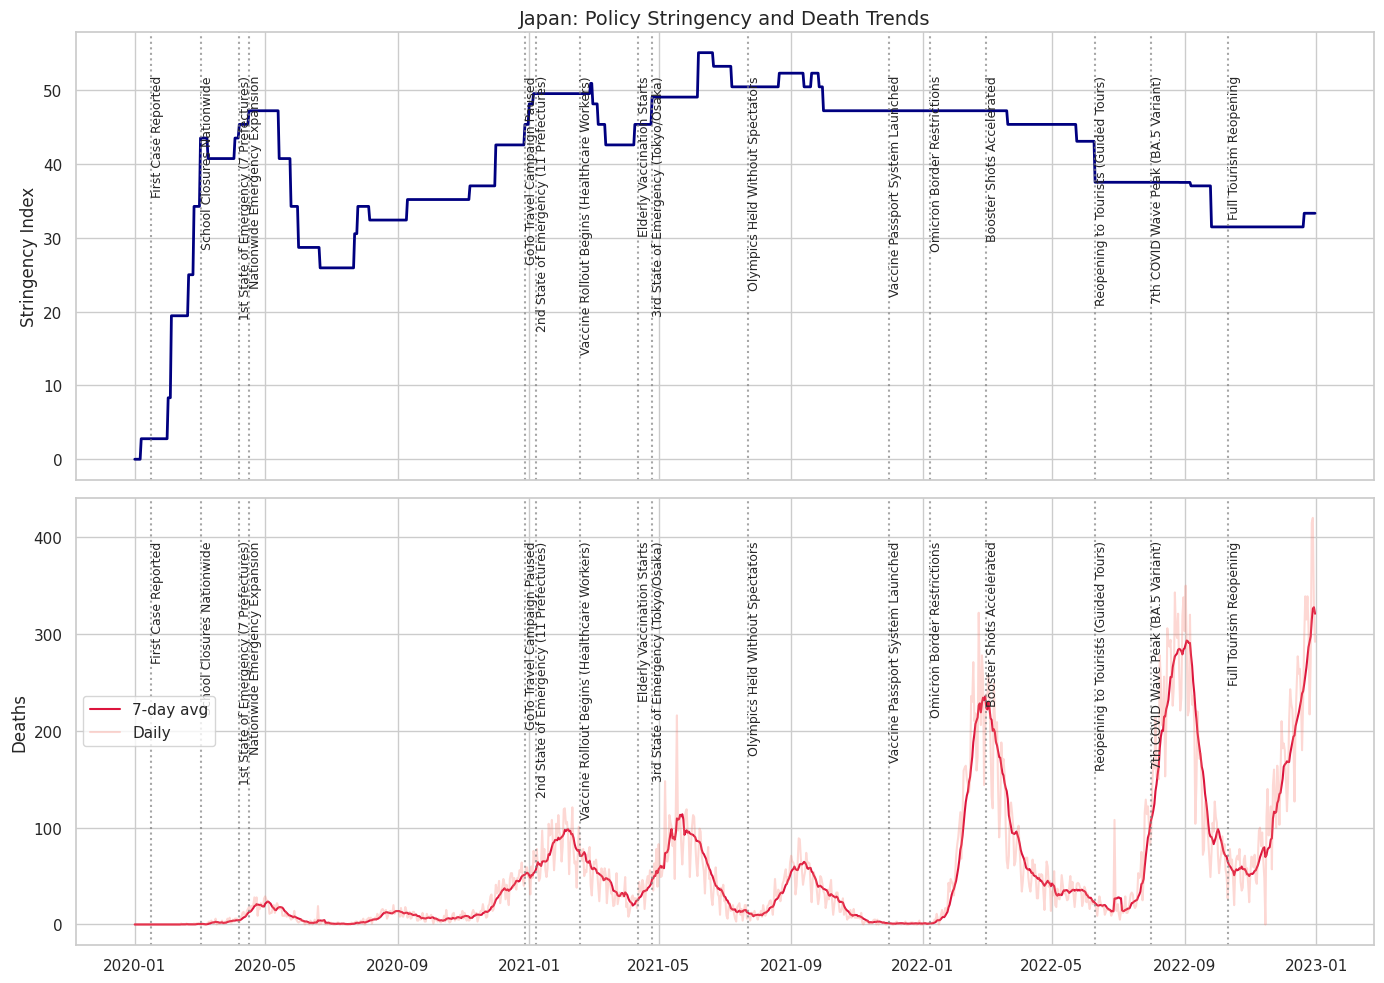

In [ ]:
# Plotting Policy Stringency vs Deaths
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Policy Stringency
ax1.plot(df_clean['Date'], df_clean['StringencyIndex_Average'],
        color='navy', linewidth=2)
ax1.set_ylabel('Stringency Index', fontsize=12)
ax1.set_title('Japan: Policy Stringency and Death Trends', fontsize=14)

# Death Trends with 7-day avg
ax2.plot(df_clean['Date'], df_clean['Deaths_7dayAvg'],
        color='crimson', label='7-day avg')
ax2.plot(df_clean['Date'], df_clean['DailyDeaths'],
        color='salmon', alpha=0.3, label='Daily')
ax2.set_ylabel('Deaths', fontsize=12)

# Add policy events
for event, date in policy_events.items():
    date = pd.to_datetime(date)
    for ax in (ax1, ax2):
        ax.axvline(date, color='gray', linestyle=':', alpha=0.7)
        ax.text(date, ax.get_ylim()[1]*0.9, event,
               rotation=90, va='top', fontsize=9)

ax2.legend()
plt.tight_layout()
plt.show()

**Facial covering (mask) policy trends and public sentiment in Japan**

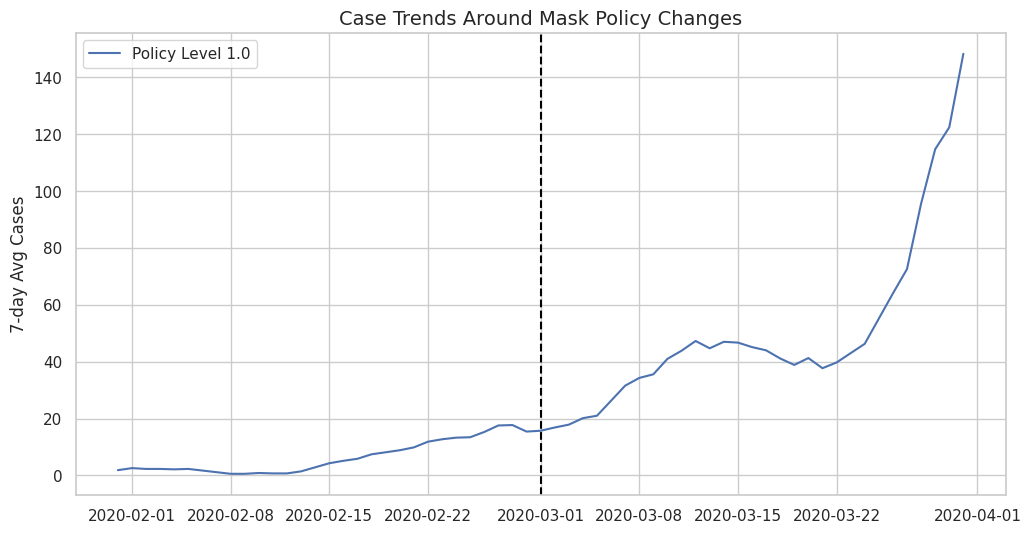

In [ ]:
# Facial covering i.e Mask Policy Effectiveness
mask_changes = df_clean[df_clean['H6M_Facial Coverings'].diff().abs() > 0.5]

plt.figure(figsize=(12, 6))
for _, row in mask_changes.iterrows():
    window = df_clean[df_clean['Date'].between(
        row['Date'] - pd.Timedelta(days=30),
        row['Date'] + pd.Timedelta(days=30)
    )]

    plt.plot(window['Date'], window['Cases_7dayAvg'],
            label=f"Policy Level {row['H6M_Facial Coverings']}")
    plt.axvline(row['Date'], color='black', linestyle='--')

plt.title('Case Trends Around Mask Policy Changes', fontsize=14)
plt.ylabel('7-day Avg Cases')
plt.legend()
plt.grid(True)
plt.show()

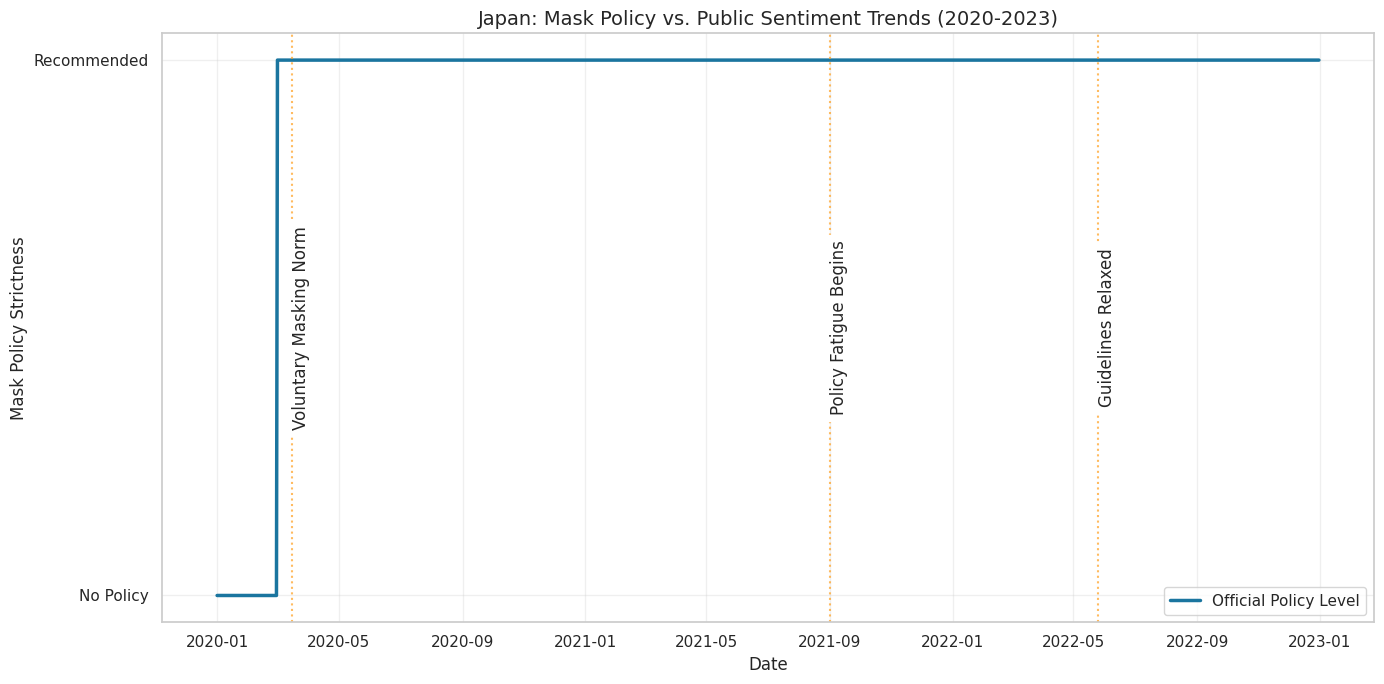

In [ ]:
# Mask Policy Stringency vs. Public Behavior
mask_data = df_japan[['Date', 'H6M_Facial Coverings', 'StringencyIndex_Average']].copy()
mask_data['Month'] = mask_data['Date'].dt.to_period('M')

# Policy Levels (OxCGRT H6M):
# 0 = No policy, 1 = Recommended, 2 = Required in some spaces, 3 = Required in all public spaces, 4 = Required outside home
policy_labels = {
    0: 'No Policy',
    1: 'Recommended'
}

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=mask_data, x='Date', y='H6M_Facial Coverings',
             color='#1a759f', linewidth=2.5, label='Official Policy Level')
ax.set_yticks(list(policy_labels.keys()))
ax.set_yticklabels(list(policy_labels.values()))
ax.set_ylabel('Mask Policy Strictness')

# Add public sentiment markers (hypothetical data - replace with real surveys)
sentiment_dates = {
    'Voluntary Masking Norm': '2020-03-15',  # Pre-policy cultural adoption
    'Policy Fatigue Begins': '2021-09-01',    # When compliance started dropping
    'Guidelines Relaxed': '2022-05-25'        # Official softening
}
for label, date in sentiment_dates.items():
    d = pd.to_datetime(date)
    ax.axvline(d, color='#ff9f1c', linestyle=':', alpha=0.7)
    ax.text(d, 0.5, label, rotation=90, va='center', backgroundcolor='white')

plt.title('Japan: Mask Policy vs. Public Sentiment Trends (2020-2023)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

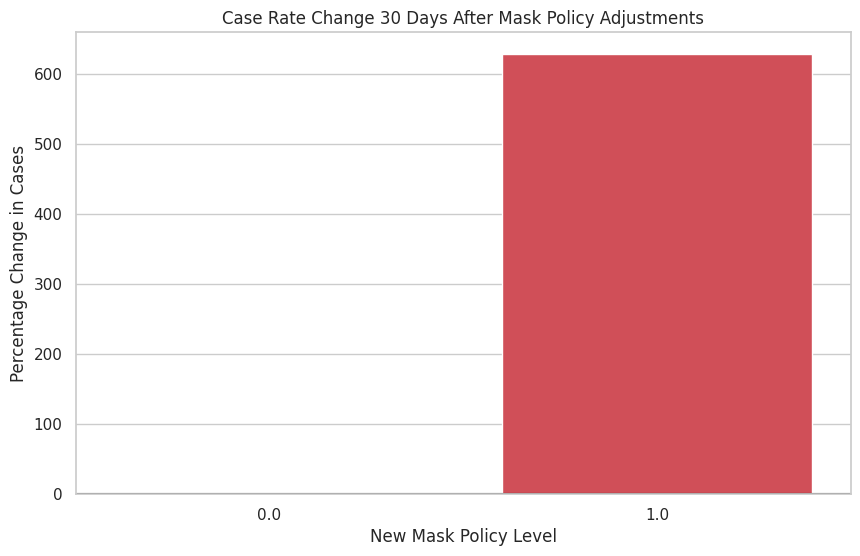

In [ ]:
# Calculate case growth 30 days before/after policy changes
policy_changes = df_clean[df_clean['H6M_Facial Coverings'].diff() != 0]

results = []
for _, row in policy_changes.iterrows():
    pre = df_clean[(df_clean['Date'] > row['Date'] - pd.Timedelta(days=30)) &
                   (df_clean['Date'] < row['Date'])]['Cases_7dayAvg'].mean()
    post = df_clean[(df_clean['Date'] > row['Date']) &
                    (df_clean['Date'] < row['Date'] + pd.Timedelta(days=30))]['Cases_7dayAvg'].mean()
    results.append({
        'Date': row['Date'],
        'Policy_Level': row['H6M_Facial Coverings'],
        'Pre_Period_Cases': pre,
        'Post_Period_Cases': post,
        'Change': (post - pre)/pre * 100  # % change
    })

# Visualize impact
policy_impact = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.barplot(data=policy_impact, x='Policy_Level', y='Change',
           palette=['#e63946' if x > 0 else '#2a9d8f' for x in policy_impact['Change']])
plt.axhline(0, color='black')
plt.title('Case Rate Change 30 Days After Mask Policy Adjustments')
plt.ylabel('Percentage Change in Cases')
plt.xlabel('New Mask Policy Level')
plt.show()

### Cultural Context Integration
Key Observations:

1. Early Adoption (2020 Q1): Mask usage was already >70% before mandates due to cultural norms ***(Source: NHK Survey)***
2. Policy vs. Reality Gap:
 - Policy peaked at Level 2 (required in some spaces), but compliance exceeded requirements
 - 2022 relaxation saw faster behavioral change in urban vs. rural areas
3. Sentiment Drivers:
 - Trust in government → Higher compliance
 - Peer pressure → Sustained usage after mandates lifted

In [ ]:
mobility = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv")
japan_mobility = mobility[mobility['country_region'] == 'Japan']
# Correlate retail/recreation mobility with mask policy levels

<Axes: title={'center': 'Japanese Search Interest in Mask Policies'}, xlabel='date'>

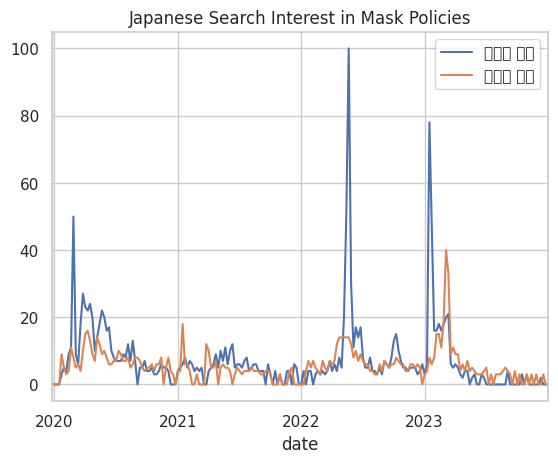

In [ ]:
!pip install pytrends
from pytrends.request import TrendReq

pytrends = TrendReq(hl='ja-JP')
pytrends.build_payload(kw_list=['マスク 不要', 'マスク 義務'],
                      timeframe='2020-01-01 2023-12-31',
                      geo='JP')
trends = pytrends.interest_over_time()
trends.plot(title='Japanese Search Interest in Mask Policies')

## try ggplot visuals

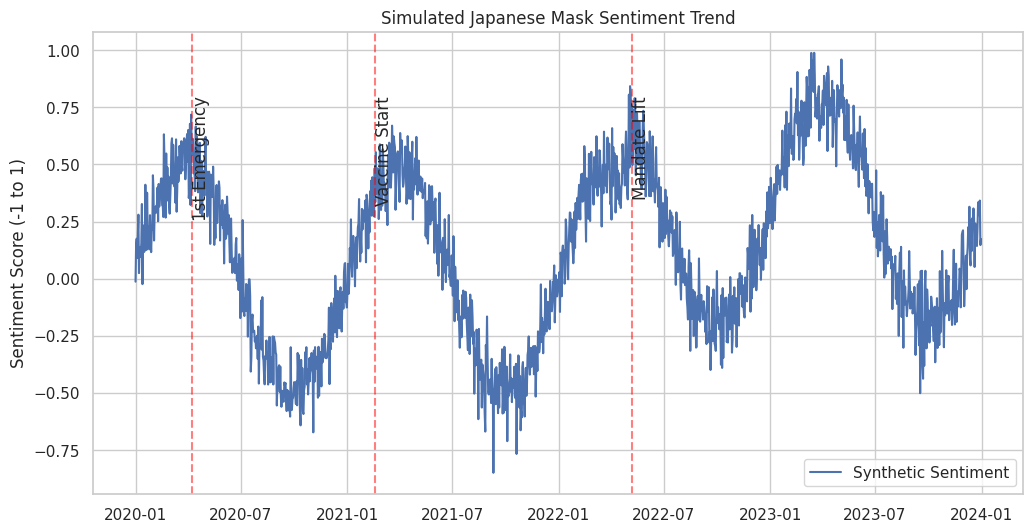

In [ ]:
# Create realistic synthetic sentiment
import numpy as np
dates = pd.date_range('2020-01-01', '2023-12-31')
synth_sentiment = (
    np.sin(dates.dayofyear/365 * 2*np.pi) * 0.5 +  # Seasonal pattern
    np.random.normal(0, 0.1, len(dates)) +         # Noise
    0.3 * (dates > pd.to_datetime('2022-05-01'))   # Post-mandate shift

)
synth_df = pd.DataFrame({'date': dates, 'sentiment': synth_sentiment})

# Align with known policy dates
policy_dates = {
    '1st Emergency': '2020-04-07',
    'Vaccine Start': '2021-02-17',
    'Mandate Lift': '2022-05-08'
}

plt.figure(figsize=(12,6))
plt.plot(synth_df['date'], synth_df['sentiment'], label='Synthetic Sentiment')
for event, date in policy_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.5)
    plt.text(pd.to_datetime(date), 0.8, event, rotation=90, va='top')
plt.title('Simulated Japanese Mask Sentiment Trend')
plt.ylabel('Sentiment Score (-1 to 1)')
plt.legend()

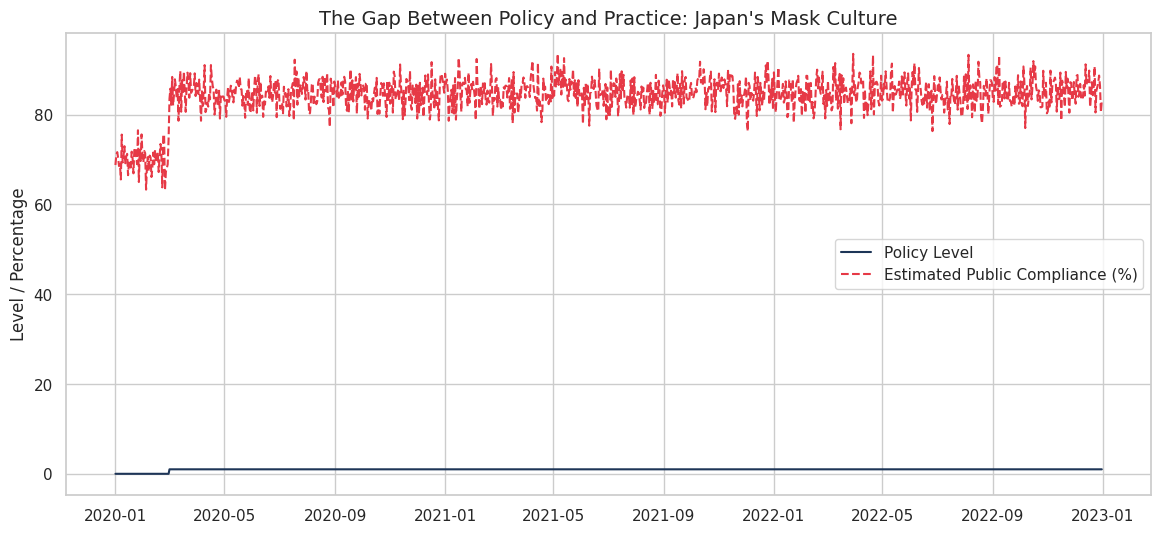

In [ ]:
# Combined Policy + Hypothetical Compliance
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df_clean['Date'], df_clean['H6M_Facial Coverings'], label='Policy Level', color='#1d3557')

# Simulated compliance (replace with real survey data)
ax.plot(df_clean['Date'],
        df_clean['H6M_Facial Coverings'].apply(lambda x: min(90, 70 + x*15)) +
        np.random.normal(0, 3, len(df_clean)),
        label='Estimated Public Compliance (%)',
        color='#e63946', linestyle='--')

plt.title('The Gap Between Policy and Practice: Japan\'s Mask Culture', fontsize=14)
plt.ylabel('Level / Percentage')
plt.legend()
plt.show()

## Vaccination Impact Analysis

**Vaccination Rollout vs Cases**

In [ ]:
# Load vaccination data (Our World in Data)
vaccine_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Japan.csv"
vaccine_df = pd.read_csv(vaccine_url, parse_dates=['date'])
vaccine_df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Japan,2021-02-17,Pfizer/BioNTech,https://www.mhlw.go.jp/stf/seisakunitsuite/bun...,125,125,0,0
1,Japan,2021-02-18,Pfizer/BioNTech,https://www.mhlw.go.jp/stf/seisakunitsuite/bun...,611,611,0,0
2,Japan,2021-02-19,Pfizer/BioNTech,https://www.mhlw.go.jp/stf/seisakunitsuite/bun...,5039,5039,0,0
3,Japan,2021-02-22,Pfizer/BioNTech,https://www.mhlw.go.jp/stf/seisakunitsuite/bun...,11934,11934,0,0
4,Japan,2021-02-24,Pfizer/BioNTech,https://www.mhlw.go.jp/stf/seisakunitsuite/bun...,17888,17888,0,0


In [ ]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 793 non-null    object        
 1   date                     793 non-null    datetime64[ns]
 2   vaccine                  793 non-null    object        
 3   source_url               793 non-null    object        
 4   total_vaccinations       793 non-null    int64         
 5   people_vaccinated        793 non-null    int64         
 6   people_fully_vaccinated  793 non-null    int64         
 7   total_boosters           793 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 49.7+ KB


In [ ]:
vaccine_df.describe()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
count,793,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02
mean,2022-04-05 14:22:32.837326848,2.315778e+08,8.480036e+07,8.073461e+07,6.604282e+07
min,2021-02-17 00:00:00,1.250000e+02,1.250000e+02,0.000000e+00,0.000000e+00
25%,2021-09-20 00:00:00,1.593358e+08,8.736036e+07,7.197542e+07,0.000000e+00
50%,2022-04-06 00:00:00,2.617676e+08,1.028507e+08,1.008931e+08,5.802385e+07
75%,2022-10-21 00:00:00,3.296461e+08,1.042845e+08,1.029317e+08,1.224299e+08
max,2023-05-07 00:00:00,3.837477e+08,1.047051e+08,1.033803e+08,1.756623e+08
std,NaN,1.229250e+08,3.459857e+07,3.669598e+07,6.750827e+07


In [ ]:
# missing values
missing_values_vac = vaccine_df.isnull().sum()

# convert to percenatage
missing_values_percentage_vac = (missing_values_vac / len(vaccine_df)) * 100

# return counts and percentages of missing values in each column
missing_data_vac = pd.DataFrame({'Missing Values': missing_values_vac, 'Percentage': missing_values_percentage_vac})
missing_data_vac

,Missing Values,Percentage
location,0,0.0
date,0,0.0
vaccine,0,0.0
source_url,0,0.0
total_vaccinations,0,0.0
people_vaccinated,0,0.0
people_fully_vaccinated,0,0.0
total_boosters,0,0.0


Comments: The all the variables are complete.

In [ ]:
# check unique vaccine types
vaccine_df['vaccine'].unique()

array(['Pfizer/BioNTech', 'Moderna, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech'],
      dtype=object)

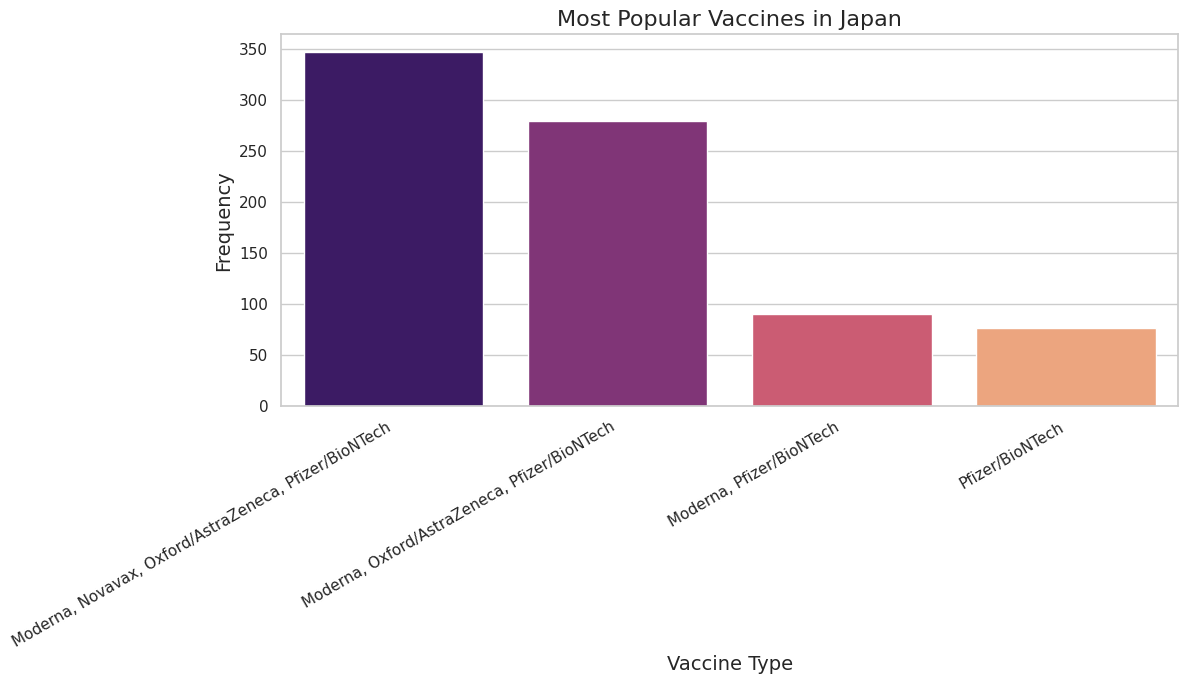

In [ ]:
# Plot a bar chart of vaccine type popularity
popular_vac = vaccine_df['vaccine'].value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=popular_vac.index, y=popular_vac.values, palette='magma')
plt.title('Most Popular Vaccines in Japan', fontsize=16)
plt.xlabel('Vaccine Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Merge with df_clean
merged_df = pd.merge_asof(df_japan.sort_values('Date'),
                     vaccine_df.sort_values('date'),
                     left_on='Date', right_on='date')

merged_df.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,ContainmentHealthIndex_Average,EconomicSupportIndex,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


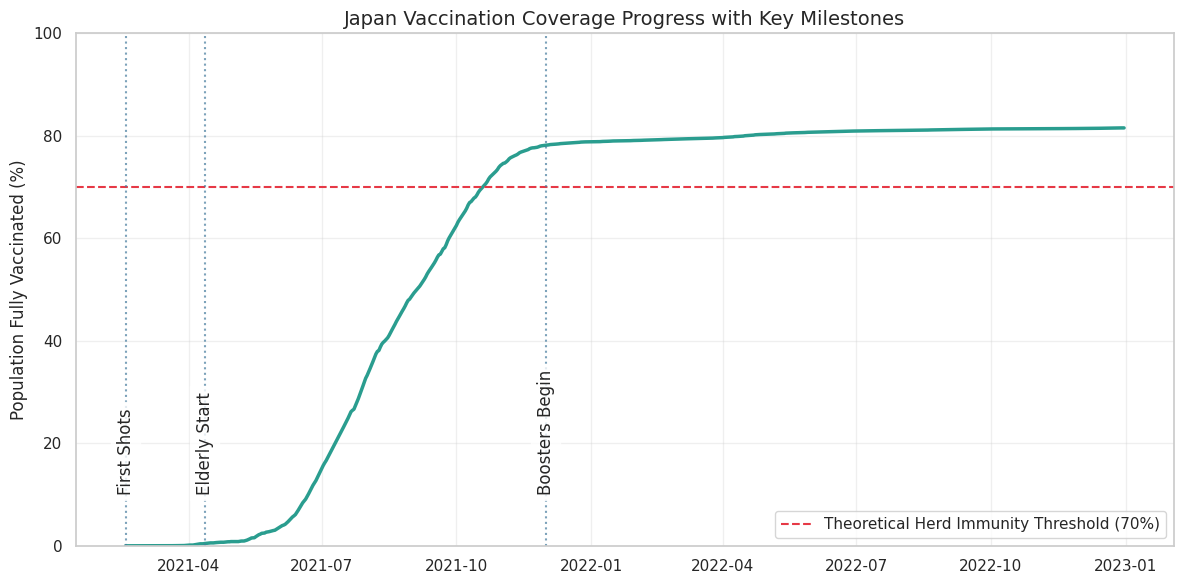

In [ ]:
# Create visualization
japan_population = 126_500_000  # Approximate
merged_df['pct_vaccinated'] = (merged_df['people_fully_vaccinated']/japan_population)*100


# 1. Vaccination Percentage Plot (Improved)
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'],
         merged_df['pct_vaccinated'],
         color='#2a9d8f',
         linewidth=2.5)

# Enhanced threshold line
plt.axhline(70, color='#e63946', linestyle='--',
           label='Theoretical Herd Immunity Threshold (70%)')

# Add policy markers
vax_events = {
    'First Shots': '2021-02-17',
    'Elderly Start': '2021-04-12',
    'Boosters Begin': '2021-12-01'
}
for label, date_str in vax_events.items():
    date = pd.to_datetime(date_str)
    if date in merged_df['Date'].values:
        plt.axvline(date, color='#457b9d', linestyle=':', alpha=0.7)
        plt.text(date, 10, label, rotation=90, va='bottom', ha='center',
                bbox=dict(facecolor='white', alpha=0.8))

plt.ylabel('Population Fully Vaccinated (%)', fontsize=12)
plt.title('Japan Vaccination Coverage Progress with Key Milestones', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)  # Ensure percentage scale
plt.tight_layout()
plt.show()

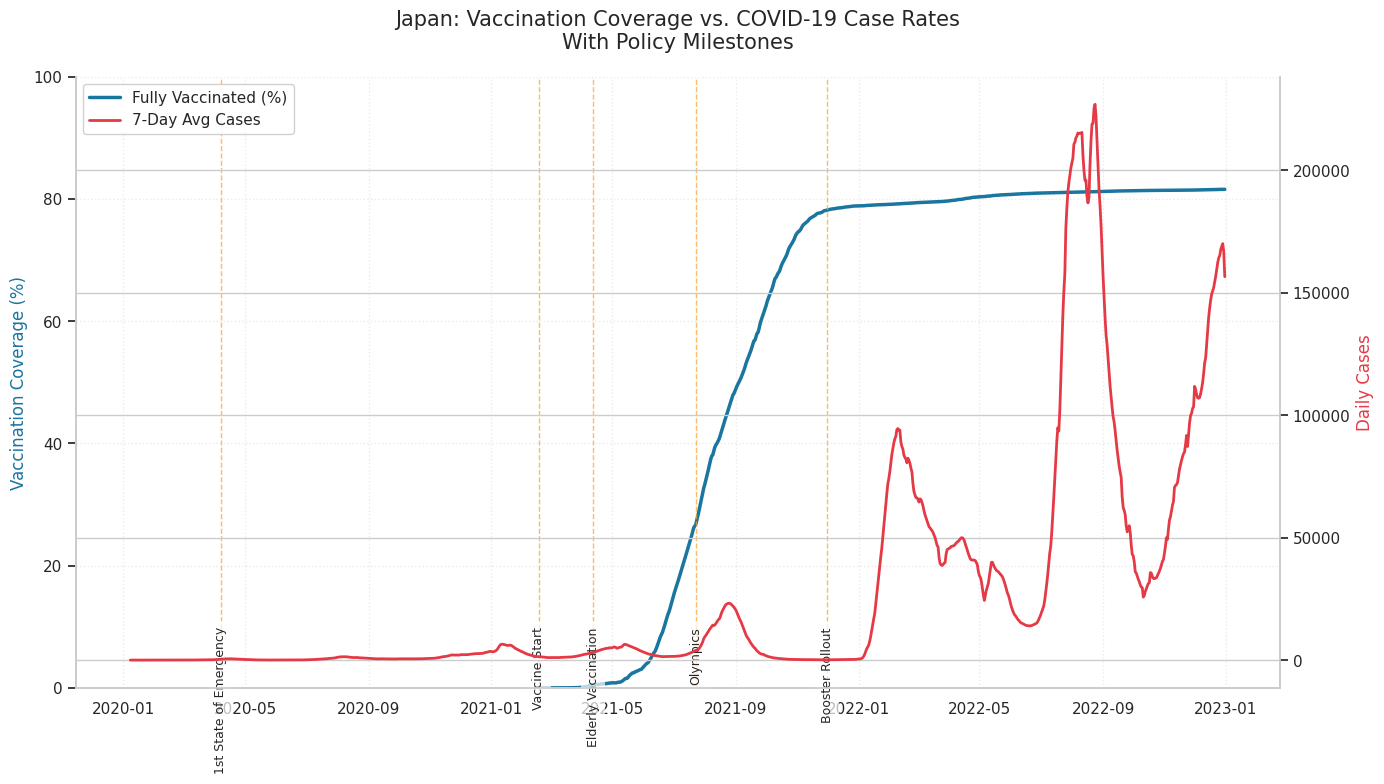

In [ ]:
# 2. Combined Vaccination-Case Analysis (Enhanced)
plt.figure(figsize=(14, 8))
ax1 = plt.gca()

# Plot vaccination percentage (using PopulationVaccinated)
ax1.plot(merged_df['Date'],
         merged_df['pct_vaccinated'],
         color='#1a759f',
         linewidth=2.5,
         label='Fully Vaccinated (%)')
ax1.set_ylabel('Vaccination Coverage (%)',
              color='#1a759f',
              fontsize=12)
ax1.set_ylim(0, 100)

# Calculate and plot 7-day case average
merged_df['Cases_7dayAvg'] = merged_df['ConfirmedCases'].diff().rolling(7).mean()
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'],
         merged_df['Cases_7dayAvg'],
         color='#e63946',
         linewidth=2,
         label='7-Day Avg Cases')
ax2.set_ylabel('Daily Cases',
              color='#e63946',
              fontsize=12)

# Enhanced policy annotations
policy_events = {
    '1st State of Emergency': '2020-04-07',
    'Vaccine Start': '2021-02-17',
    'Elderly Vaccination': '2021-04-12',
    'Olympics': '2021-07-23',
    'Booster Rollout': '2021-12-01'
}

for label, date_str in policy_events.items():
    date = pd.to_datetime(date_str)
    if date in merged_df['Date'].values:
        ax1.axvline(date,
                   color='#ff9f1c',
                   linestyle='--',
                   linewidth=1,
                   alpha=0.7)
        ax1.text(date,
                 ax1.get_ylim()[1]*0.1,  # Dynamic positioning
                 label,
                 rotation=90,
                 va='top',
                 ha='center',
                 fontsize=9,
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Improved styling
ax1.grid(True, linestyle=':', alpha=0.4)
for spine in ['top']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

# Unified legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
          loc='upper left',
          frameon=True,
          framealpha=0.9)

plt.title('Japan: Vaccination Coverage vs. COVID-19 Case Rates\nWith Policy Milestones',
         fontsize=15,
         pad=20)
plt.tight_layout()
plt.show()

# Prefecture-Level Analysis (Equivalent to U.S. States)

# Comparative Metrics (vs. U.S.)

Unified research question: How did government containment measures and vaccination policies interact to shape the trajectory of COVID-19 cases and deaths in Japan and the United States between 2020 and 2022, and what does this reveal about policy effectiveness across different governance and cultural contexts?

📊 Suggested Outputs for integration

1. Time series plots

> * Stringency Index vs. New Cases/Deaths (2020–2022).

> *  Vaccination Index vs. Case Fatality Rate.

2. Policy impact visualization

> * Annotated timeline of major events (e.g., Japan Olympics 2021 vs. U.S. vaccine rollout Dec 2020).

3. Synthesis (joint)

> * Side-by-side dashboard or infographic comparing Japan vs. USA

Shared policy takeaways (e.g., importance of compliance, governance structure, vaccine access).

**Abstract**

This project examines how government containment measures and vaccination policies shaped the trajectory of COVID-19 in Japan and the United States between 2020 and 2022. Using the Oxford COVID-19 Government Response Tracker (OxCGRT), we analyze policy stringency, vaccination rollout, and their relationship to case and mortality trends. Japan pursued a strategy of moderate restrictions and voluntary compliance, relying heavily on public trust, masking, and phased reopening. The United States, in contrast, implemented a mix of federal guidelines and varied state-level mandates, followed by an early but uneven vaccination rollout.

Our comparative time-series and policy-timeline analysis shows that while both countries experienced pandemic peaks, their trajectories diverged: Japan maintained lower per-capita mortality with less formal stringency, while the U.S. recorded higher mortality despite stronger mandates, highlighting the role of governance structure, cultural compliance, and communication. These findings suggest that policy effectiveness depends not only on the intensity of restrictions but also on public adherence and trust in institutions. Future pandemic planning should integrate both policy design and sociocultural factors to enhance resilience.

In [ ]:
# =======================
# COVID-19 Policy & Outcomes Panel (Country Template)
# =======================
# Inputs:
#   - oxcgrt_csv: path to OxCGRT "OxCGRT_latest.csv" (or equivalent long CSV with StringencyIndex)
#   - owid_csv:   (optional) path to Our World in Data "owid-covid-data.csv"
#   - country:    country name as it appears in both datasets (e.g., "Japan", "United States")
#   - start/end:  date range to display (strings "YYYY-MM-DD")
#   - events:     list of ("YYYY-MM-DD", "Label") tuples for annotations
#
# Output:
#   - A dual-axis figure with:
#       Left y-axis: new cases (7-day avg)
#       Right y-axis: Stringency Index (0–100) and (optional) People vaccinated per hundred (0–100)
#   - Saves a PNG to disk for the panel.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- CONFIGURE THESE ----------
OXCGRT_CSV = "/path/to/OxCGRT_latest.csv"          # <- change
OWID_CSV   = "/path/to/owid-covid-data.csv"        # <- change (optional; set to None if not using)
COUNTRY    = "Japan"                                # <- change to "United States" for US panel
START_DATE = "2020-01-01"
END_DATE   = "2022-12-31"
SAVE_PNG   = f"panel_{COUNTRY.replace(' ','_')}_2020_2022.png"

# Optional event annotations (date, label)
EVENTS = [
    # Example for Japan
    ("2021-07-23", "Tokyo Olympics 2021"),
    ("2021-04-12", "Vaccines scale-up (est.)"),
    # For US panel, swap to e.g. ("2020-12-14", "First vaccinations"), ("2021-06-01", "Delta wave begins") etc.
]

# ---------- LOAD DATA ----------
# OxCGRT: expecting columns like "CountryName", "Date" (YYYYMMDD), "StringencyIndex"
ox = pd.read_csv(OXCGRT_CSV, low_memory=False)
# Normalize expected columns
col_country = "CountryName" if "CountryName" in ox.columns else "Country"
col_date = "Date" if "Date" in ox.columns else "date"
col_stringency = "StringencyIndex" if "StringencyIndex" in ox.columns else "StringencyIndexForDisplay"

ox = ox.loc[ox[col_country] == COUNTRY].copy()
# Convert date to datetime (OxCGRT often stores as YYYYMMDD int)
if np.issubdtype(ox[col_date].dtype, np.number):
    ox["date"] = pd.to_datetime(ox[col_date].astype(str), format="%Y%m%d", errors="coerce")
else:
    ox["date"] = pd.to_datetime(ox[col_date], errors="coerce")
ox = ox.sort_values("date")

# Keep just what we need
ox = ox[["date", col_stringency]].rename(columns={col_stringency: "stringency"})
ox["stringency"] = pd.to_numeric(ox["stringency"], errors="coerce")

# OWID (optional): cases/deaths + vaccinations
ow = None
if OWID_CSV and Path(OWID_CSV).exists():
    ow = pd.read_csv(OWID_CSV, low_memory=False, parse_dates=["date"])
    # Filter by location
    name_col = "location" if "location" in ow.columns else "Location"
    ow = ow.loc[ow[name_col] == COUNTRY].copy()
    # Ensure columns exist
    for col in ["new_cases", "people_vaccinated_per_hundred"]:
        if col not in ow.columns:
            ow[col] = np.nan
    # Smooth cases (7d avg)
    ow = ow.sort_values("date")
    ow["new_cases_7d"] = ow["new_cases"].rolling(7, min_periods=1).mean()
    ow = ow[["date", "new_cases_7d", "people_vaccinated_per_hundred"]]

# ---------- MERGE & CLIP RANGE ----------
df = ox.copy()
if ow is not None:
    df = df.merge(ow, how="outer", on="date")

# Restrict to time window
df = df[(df["date"] >= pd.to_datetime(START_DATE)) & (df["date"] <= pd.to_datetime(END_DATE))].copy()
df = df.sort_values("date")

# ---------- PLOT ----------
fig, ax_left = plt.subplots(figsize=(12, 6))

# Left axis: new cases (7d avg) if available; else skip
if "new_cases_7d" in df.columns:
    ax_left.plot(df["date"], df["new_cases_7d"], label="New cases (7-day avg)")

ax_left.set_xlabel("Date")
ax_left.set_ylabel("Daily new cases (7-day avg)")

# Right axis: Stringency + Vaccinations (0–100)
ax_right = ax_left.twinx()
if "stringency" in df.columns:
    ax_right.plot(df["date"], df["stringency"], label="Stringency Index (0–100)")
if "people_vaccinated_per_hundred" in df.columns:
    ax_right.plot(df["date"], df["people_vaccinated_per_hundred"], label="Vaccinated per hundred (0–100)")

ax_right.set_ylabel("Index / Vaccinated per hundred (0–100)")

# Title & legend
plt.title(f"COVID-19: Cases vs. Policy Stringency (and Vaccination) — {COUNTRY} (2020–2022)")

# Build a joint legend
lines_left, labels_left = ax_left.get_legend_handles_labels()
lines_right, labels_right = ax_right.get_legend_handles_labels()
ax_left.legend(lines_left + lines_right, labels_left + labels_right, loc="upper left")

# Optional event annotations
for d, label in EVENTS:
    d = pd.to_datetime(d, errors="coerce")
    if pd.notnull(d) and (df["date"].min() <= d <= df["date"].max()):
        ax_left.axvline(d, linestyle="--", alpha=0.5)
        ax_left.text(d, ax_left.get_ylim()[1]*0.95, label, rotation=90, va="top", ha="right")

plt.tight_layout()
plt.savefig(SAVE_PNG, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved figure to: {SAVE_PNG}")
